In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Relative interest measure
The aim of developing a relative interest measure is being able to assess the interest a given country had on a given wikipedia page.

To this end it is necessary to know the percentage of contributions made by that specific country to a given page, and the percentage of contributions the given country typically makes to Wikipedia.

This measure of relative interest is scaled in the interval [-1,1], where negative numbers represent LOWER_THAN_USUAL and positive numbers represent HIGHER_THAN_USUAL interest. This measure reaches 0 if the contributions made to the current page match the global contributions from the country. The measure grows linearly between [-1,0) and asymptotic between (0,1].

The following graphs show the relative interest as a function of the number of contributions made by a particular country:

In [2]:
import btb.utils.tools as btbtools
from __future__ import division

When contributions are 0.5 times the normal contribution, relative interest is -0.50
When contributions are 1.5 times the normal contribution, relative interest is 0.33
When contributions are 2.0 times the normal contribution, relative interest is 0.50
When contributions are 4.0 times the normal contribution, relative interest is 0.75
When contributions are 10.0 times the normal contribution, relative interest is 0.90


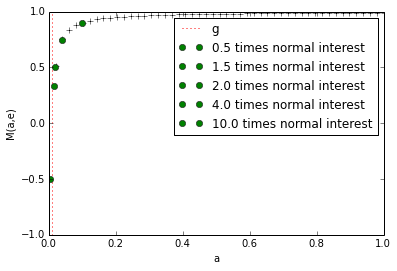

In [3]:
g = 0.01
p = np.linspace(0,1)

ri = [ btbtools.relativeInterest(g,pn) for pn in p]
plot(p,ri, 'k+')
plot([g,g],[-1,1],'r:', label='g')

for t in [ 0.5, 1.5, 2, 4, 10 ]:
    tNorm = g * t
    if tNorm<1.0:
        ri = btbtools.relativeInterest(g,tNorm)
        plot(tNorm,ri,'go', label='{:3.1f} times normal interest'.format(t))
        print ('When contributions are {:3.1f} times the normal contribution, ' + \
            'relative interest is {:4.2f}').format(t,ri)

xlabel('a')
ylabel('M(a,e)')
legend(loc='best');

When contributions are 0.5 times the normal contribution, relative interest is -0.50
When contributions are 1.5 times the normal contribution, relative interest is 0.33
When contributions are 2.0 times the normal contribution, relative interest is 0.50


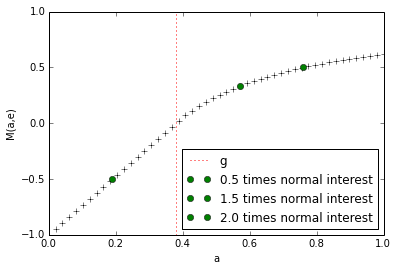

In [4]:
g = 0.38
p = np.linspace(0,1)

ri = [ btbtools.relativeInterest(g,pn) for pn in p]
plot(p,ri, 'k+')
plot([g,g],[-1,1],'r:', label='g')

for t in [ 0.5, 1.5, 2, 4, 10 ]:
    tNorm = g * t
    if tNorm<1.0:
        ri = btbtools.relativeInterest(g,tNorm)
        plot(tNorm,ri,'go', label='{:3.1f} times normal interest'.format(t))
        print ('When contributions are {:3.1f} times the normal contribution, ' + \
            'relative interest is {:4.2f}').format(t,ri)

xlabel('a')
ylabel('M(a,e)')
legend(loc='best');

# Remarks

These graphs illustrate the behaviour of the relative interest measure. As it can be observed, the relative interest adheres to a consistent ratio between the number of contributions made and the global number of contributions.

For example, take two countries (US and NL), with global contribution proportions: global[US] = 40% and global[NL] = 1%. Given a page 'X', where these countries contribute pageX[US] = 60% and pageX[NL] = 1.5% (i.e, both countries contribution is 1.5 times their global contribution), then their relative interest would be the same: relInterest[US] = relInterest[NL] = 0.33.

Although the relative interest measure is 'fair' in giving the same score to both countries on the example above, it has an intrinsic limiting factor: countries which have a high contribution average (such as US in the example above) are limited to the amount of relative interest they can express.

For example, a country P with global contributions global[P] = 0.20 could, at the most express an interest relInterest[P] = 0.80. While a country Q with global contributions global[Q] = 0.02, the maximum interest it can express is relInterest[Q] = 0.98. This is because the contributions of P to page X can never exceed pageX[P] = 1 (5 times global[P]) while pageX[Q] = 1 (50 times global[Q]), and thus relInterest[P] has an upper limit pageX[P] = (1-global[P]) = 0.80


In [5]:
for g in [ 0.20, 0.02 ]:
    ri = btbtools.relativeInterest(g, 1)
    print 'For a country P with global[P] = {:4.2f}, the maximum relInterest[P] = {:4.2f}'.format(g, ri)

For a country P with global[P] = 0.20, the maximum relInterest[P] = 0.80
For a country P with global[P] = 0.02, the maximum relInterest[P] = 0.98
